<a href="https://colab.research.google.com/github/alicevadney/DS3001-assignments/blob/main/DS_3001_Hedonic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Clean the data and perform some EDA and visualization to get to know the data set.




In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/airbnb_hw.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [36]:
# change the price variable to a numeric column
df["Price"] = df["Price"].str.replace(",","").astype(float)
df["Price"] = pd.to_numeric(df["Price"])

df = df.dropna(subset=['Price', 'Property Type', 'Beds', 'Review Scores Rating'])

In [37]:
# table of price by room type
df.loc[:,['Price','Room Type'] ].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  12862.0  203.501477  176.755469  27.0  132.0  175.0  225.0   
Private room      8705.0   88.250431   40.524457  25.0   65.0   80.0  100.0   
Shared room        542.0   67.865314   41.995801  10.0   45.0   56.0   80.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room       999.0  
Shared room        400.0

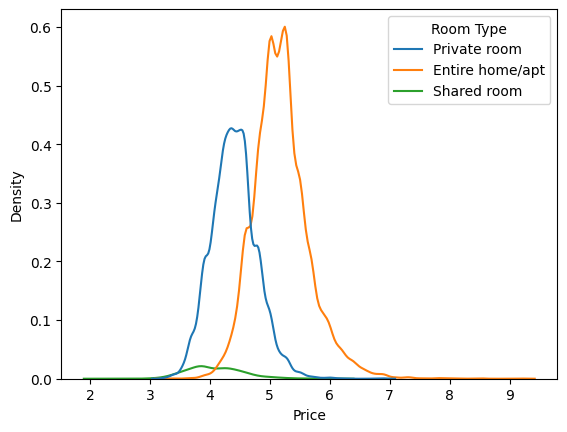

In [38]:
sns.kdeplot(x=np.log(df['Price']), hue=df['Room Type'])
plt.show()

In [39]:
# table of price by bed
df.loc[:,['Price','Beds'] ].groupby('Beds').describe()

Price                                                                 
        count         mean          std    min     25%    50%     75%      max
Beds                                                                          
0.0       1.0    65.000000          NaN   65.0   65.00   65.0    65.0     65.0
1.0   14504.0   123.041713    74.659670   10.0   75.00  105.0   155.0   3500.0
2.0    4941.0   184.584699   191.878801   27.0  110.00  160.0   220.0  10000.0
3.0    1594.0   235.756587   182.067818   26.0  140.00  199.0   290.0   3100.0
4.0     601.0   279.034942   206.869259   27.0  150.00  235.0   359.0   3000.0
5.0     227.0   357.735683   357.386384   35.0  180.00  280.0   450.0   4500.0
6.0     146.0   380.239726   407.983068   35.0  183.75  271.0   400.0   2750.0
7.0      38.0   320.894737   207.649756   55.0  177.00  292.0   395.0    900.0
8.0      16.0   466.125000   366.842541   55.0  243.75  350.0   445.0   1300.0
9.0       9.0   618.888889   274.075466  175.0  495.00  650.0   775.0   1050.0
10.0     15.0   463.866667   299.715071   95.0  287.00  400.0   650.0   1050.0
11.0      3.0   226.333333   129.616100  100.0  160.00  220.0   289.5    359.0
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.0   5000.0
16.0     10.0   699.300000   531.297374  104.0  319.25  550.0  1000.0   1500.0

*It appears that entire homes or apartments are on average the most expensive Airbnb types, which makes sense because they usually offer the most space and privacy.*

### 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [40]:
# Check for categorical variables and transform them
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df1 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df1.head()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Host Since_1/1/2012,Host Since_1/1/2013,...,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Private room,Room Type_Shared room
4,500,95.0,10036.0,3.0,1,39,549.0,96.0,False,False,...,False,False,False,False,False,False,False,False,True,False
5,1039,100.0,11222.0,1.0,1,4,149.0,100.0,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1783,100.0,10004.0,1.0,1,9,250.0,100.0,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2078,90.0,11201.0,1.0,1,80,90.0,94.0,False,False,...,False,False,False,False,False,False,False,False,True,False
8,2339,90.0,10009.0,2.0,1,95,270.0,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False


###3. Implement an 80/20 train-test split. Put the test data aside.


In [10]:
from sklearn.model_selection import train_test_split

In [42]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

### 4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and R^2 on the both the training and test sets. Which of your models does the best?


*Linear model with no intercept*

In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

*Model #1*

In [56]:
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('R Squared: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Root Mean Square Error: ', rmse)


R Squared:  0.11706584408481102
Root Mean Square Error:  161.9695019445024


In [46]:
table = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
table

,variable,coefficient
0,Review Scores Rating,0.767851
1,Entire home/apt,131.662406
2,Private room,18.338320
3,Shared room,-1.291167


*Model #2*

In [61]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Beds', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Room Type'], dtype='int'),
                    pd.get_dummies(X_train['Beds'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Room Type'], dtype='int'),
                    pd.get_dummies(X_test['Beds'], dtype='int')],
                    axis = 1)

# Ensure all column names are strings
Z_train.columns = Z_train.columns.astype(str)
Z_test.columns = Z_test.columns.astype(str)

Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('R Squared: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Root Mean Square Error: ', rmse)

R Squared:  0.1568367178633806
Root Mean Square Error:  158.27959516421643


Because it has a lower RMSE, model 2 is better suited to the data.

###5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and R^2 on the training and test sets. How does the more complex model your build compare to the simpler ones?


In [63]:
from sklearn.preprocessing import PolynomialFeatures

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Room Type'], dtype='int'),
                     pd.get_dummies(X_train['Beds'], dtype='int')],
                    axis=1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Room Type'], dtype='int'),
                    pd.get_dummies(X_test['Beds'], dtype='int')],
                    axis=1)

Z_train.columns = Z_train.columns.astype(str)
Z_test.columns = Z_test.columns.astype(str)
Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)

poly = PolynomialFeatures(degree=2, include_bias=False)
Z_train_poly = poly.fit_transform(Z_train)
Z_test_poly = poly.transform(Z_test)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train_poly, y_train)

y_hat = reg.predict(Z_test_poly)

print('R Squared: ', reg.score(Z_test_poly, y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('Root Mean Square Error: ', rmse)


R Squared:  0.15562694943577693
Root Mean Square Error:  158.3931040336763


*This model is actually slightly less accurate than the linear model chosen from step 4!*

###6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

The first model that I fit to the data was the worst fit of all three. This might be due to its simplicity (only including two variables) and therefore underfitting the data. The second model was a linear model that included three variables and was the best fit overall. The third model was more complex, including interactions, and was a slightly worse fit than the second, potentially pointing to the model starting to overfit the training data. I have learned that the model that is best for the data may not always be the most complex model.